In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import torch
import SPIB
import test_SPIB_training as training
import time
import os
import constraints
import subprocess
import matplotlib
from matplotlib import colors as c
print(os.getcwd())

/media/ebeyerle/Expansion/Seagate/umd/spib/pocket/new/GROMACS/hocky/topology/z/TERP


In [2]:
def reconstruct_SPIB(beta, gamma, bandwidth, nn, lag, RC_dim = 2, pseduo_dim = 10, output_dim = 10, data_shape = (2,),
                    encoder_type = 'Nonlinear', seed = '0', lr = 0.0001000, path = './'):

    neuron_num1 = nn
    neuron_num2 = nn
    device = torch.device("cpu") #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Update Label
    ## Remember to update both directories
    UpdateLabel = True
    prefix_00 = path + str(bandwidth) + '/neurons/' + str(nn)
    representative_inputs_path = prefix_00 + '/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%.6f_representative_inputs%d.npy' % (RC_dim, lag, beta, gamma, lr, seed)
    prefix = prefix_00 + "/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%.6fcpt%d/IB_final_cpt.pt" % (RC_dim, lag, beta, gamma, lr, seed)

    print(prefix)
    restore_path=prefix
    representative_inputs = torch.tensor(np.load(representative_inputs_path))
    index = 1
    encoder_type = 'Nonlinear'
    IB = SPIB.SPIB(encoder_type, RC_dim, output_dim, data_shape, device, UpdateLabel, neuron_num1, neuron_num2)
    IB.reset_representative(representative_inputs)
    checkpoint=torch.load(restore_path)
    IB.load_state_dict(checkpoint['state_dict'])
    weight0=IB.encoder[0].weight.cpu().data.numpy()
    weight1=IB.encoder[2].weight.cpu().data.numpy()
    weight2=IB.encoder_mean.weight.cpu().data.numpy()
    bias0=IB.encoder[0].bias.cpu().data.numpy()
    bias1=IB.encoder[2].bias.cpu().data.numpy()
    bias2=IB.encoder_mean.bias.cpu().data.numpy()
    return IB

def reconstruct_SPIB_HP(beta, gamma, bandwidth, nn, lag, RC_dim = 2, pseduo_dim = 10, output_dim = 10, data_shape = (2,),
                    encoder_type = 'Nonlinear', seed = '0', lr = 0.0001000, path = './'):

    neuron_num1 = nn
    neuron_num2 = nn
    device = torch.device("cpu") #torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    # Update Label
    ## Remember to update both directories
    UpdateLabel = True
    prefix_00 = path + str(bandwidth) + '/neurons/' + str(nn)
    representative_inputs_path = prefix_00 + '/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%f_representative_inputs%d.npy' % (RC_dim, lag, beta, gamma, lr, seed)
    prefix = prefix_00 + "/Unweighted_d=%d_t=%d_b=%.9f_gamma=%.9f_learn=%fcpt%d/IB_final_cpt.pt" % (RC_dim, lag, beta, gamma, lr, seed)

    print(prefix)
    restore_path=prefix
    representative_inputs = torch.tensor(np.load(representative_inputs_path))
    index = 1
    encoder_type = 'Nonlinear'
    IB = SPIB.SPIB(encoder_type, RC_dim, output_dim, data_shape, device, UpdateLabel, neuron_num1, neuron_num2)
    IB.reset_representative(representative_inputs)
    checkpoint=torch.load(restore_path)
    IB.load_state_dict(checkpoint['state_dict'])
    weight0=IB.encoder[0].weight.cpu().data.numpy()
    weight1=IB.encoder[2].weight.cpu().data.numpy()
    weight2=IB.encoder_mean.weight.cpu().data.numpy()
    bias0=IB.encoder[0].bias.cpu().data.numpy()
    bias1=IB.encoder[2].bias.cpu().data.numpy()
    bias2=IB.encoder_mean.bias.cpu().data.numpy()
    return IB

In [3]:
params = {'legend.fontsize': 16,
          'figure.figsize': (8, 6),
         'axes.labelsize': 30,
         'axes.titlesize':25,
         'xtick.labelsize':25,'ytick.labelsize':25,
         'axes.linewidth':4,
         'xtick.major.width':3,'ytick.major.width':3,
         'xtick.minor.width':1,'ytick.minor.width':1,
         'xtick.major.size':5,'ytick.major.size':5,
         'xtick.minor.size':3,'ytick.minor.size':3,
         'xtick.direction':'in','ytick.direction':'in'
         }
plt.rcParams.update(params)

In [9]:
# load from file
file_path = '../analysis/sparse/delta_variational/1e-1/neurons/64/'
b = float(np.loadtxt('../b.txt'))
beta = b
timestep = 0.2
#for i in range(2, 6):
#    print(i)
i = 2
driver_colvar = np.load('../sparse_traj_data.npy')
weights = np.load('../sparse_weights.npy')
energy = np.loadtxt('../sparse_e.txt', max_rows = len(driver_colvar))
traj_labels = np.load('../sparse_init_traj_labels.npy')
rho = driver_colvar[:,3]
z = driver_colvar[:,2]
if i == 2:
    big_colvar = driver_colvar
    big_weights = weights
    big_energy = energy
    big_traj_labels = traj_labels
else:
    big_colvar = np.concatenate((big_colvar, driver_colvar))
    big_weights = np.concatenate((big_weights, weights))
    big_energy = np.concatenate((big_energy, energy))
    big_traj_labels = np.concatenate((big_traj_labels, traj_labels))

print(len(big_colvar), len(big_weights), len(big_energy), len(big_traj_labels))

94241 94241 94241 94241


In [10]:
big_driver_colvar = big_colvar
rho = big_driver_colvar[:,3]
z = big_driver_colvar[:,2]
Nwp = big_driver_colvar[:,-2]
Nwm = big_driver_colvar[:,-1]

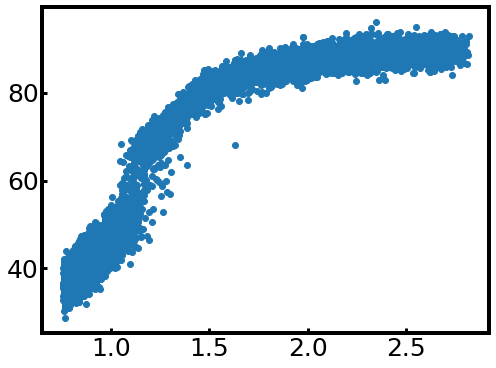

In [11]:
plt.scatter(z[::10], Nwm[::10])

In [12]:
x = z
y = Nwp

data = np.copy(big_colvar)
Ut = np.copy(big_energy)

In [13]:
b = float(np.loadtxt('../b.txt'))
output_thermo = True

64 0.1 0.1 1 1e-1
../analysis/sparse/delta_variational/1e-1/neurons/64/Unweighted_d=1_t=1_b=0.100000000_gamma=0.100000000_learn=0.000100cpt0/IB_final_cpt.pt
2


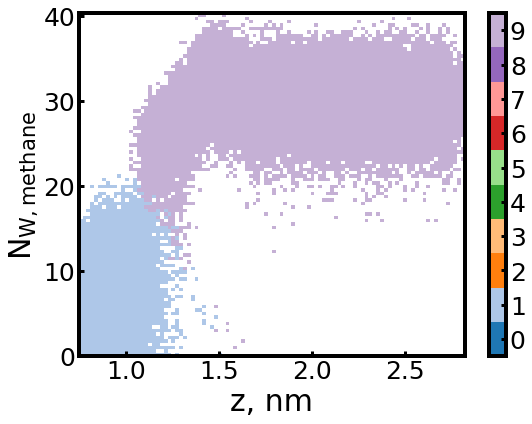

In [14]:
import matplotlib
from matplotlib import colors as c
nreps = 1
seed = 0
lr = 0.0001000
z1_bar_list = []
z_list = []
z1_thermo_list = []
z1_filtered_thermo_list = []
traj_labels_list = []
for nn in [64]:
    for lag in [1]:
        for beta in [1e-1]:
            for gamma in [1e-1]:
                for bandwidth in ["1e-1"]:
                    print(nn, beta, gamma, lag, bandwidth)
                    path = '../analysis/sparse/delta_variational/'


                    try:
                        prefix='../analysis/sparse/delta_variational/' + bandwidth + '/neurons/' + str(nn) + '/Unweighted_d=1_t=' + str(lag) + '_b=%.9f_gamma=%.9f_learn=%.6f' % (beta, gamma, lr)
                        #print(prefix)
                        repeat = str(seed)
                        IB = reconstruct_SPIB(beta, gamma, bandwidth, nn, lag, RC_dim = 1, pseduo_dim = 10, output_dim = 10, data_shape = (6,),
                        encoder_type = 'Nonlinear', seed = seed, path = path)
                        data_torch = torch.Tensor(data)
                        data_torch.requires_grad = True
                        outputs, z_sample, z_mean, z_logvar = IB.forward(data_torch)

                        tensor_weights = torch.Tensor(big_weights)
                        aux_loss, G11, U11, S11 = constraints.delta_variational(data_torch, 
                                                                                     z_mean, Ut, 
                                                                                     bins = 50, bandwidth = 1.0, 
                                                                                     output_thermo = output_thermo,
                                                                                     b = b, weights = tensor_weights)
                        z = z_mean.detach().numpy()

                        #print('loading labels...')
                        dummy = []
                        for i in range(nreps):
                            dummy.append(np.load(prefix + "_traj" + str(i) + "_labels" + repeat + ".npy"))
                        traj_labels = np.concatenate(dummy, axis = 0)

                        labels=traj_labels
                         # clean labeled trajectory by removing any states that are not sampled
                        idx = np.argwhere(np.all(traj_labels == 0, axis=0))
                        #labels = np.delete(traj_labels, idx, axis=1)
                        dtrajs = labels.argmax(1)
                        nstates = len(np.unique(dtrajs))
                        print(nstates)
                        #if len(np.unique(dtrajs)) <= 2:
                        #    break
                        hist=plt.hist2d(x,y,bins=100)


                        state_num=labels.shape[1]
                        state_labels=np.arange(state_num)

                        hist_state=np.zeros([state_num]+list(hist[0].shape))

                        for i in range(state_num):
                            hist_state[i]=plt.hist2d(x,y,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

                        label_map50=np.argmax(hist_state,axis=0).astype(float)
                        label_map50[hist[0]==0]=np.nan
                        plt.close()
                        fig, ax = plt.subplots()

                        fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
                        tickz = np.arange(0,len(state_labels))

                        cMap = c.ListedColormap(plt.cm.tab20.colors[0:10])
                        im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
                        cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

                        # plot labels of occupied states
                        dummy = labels.sum(0)
                        xloc = -0.75
                        #for n, i in enumerate(dummy):
                        #    if i != 0:
                        #        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
                        #        xloc += 0.2

                        plt.xlabel(r"z, nm")
                        plt.ylabel(r"N$_{\mathrm{W, methane}}$")
                        plt.tight_layout()
                        plt.savefig(prefix + '_metastable_decomposition.pdf', dpi = 300)
                        plt.show()
                        plt.close()

                        
                    except FileNotFoundError:
                        pass
                    
z1_thermo = np.array(z1_thermo_list)

z1_filtered_thermo = np.array(z1_filtered_thermo_list, dtype = 'object')

zs = np.array(z_list)

64 0.1 0.1 1 1e-1
../analysis/sparse/delta_variational/1e-1/neurons/64/Unweighted_d=1_t=1_b=0.100000000_gamma=0.100000000_learn=0.000100cpt0/IB_final_cpt.pt
2


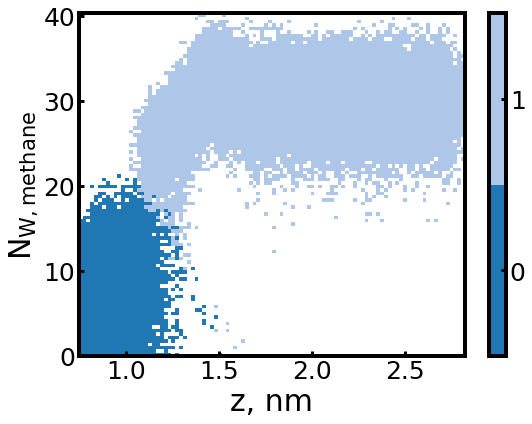

/tmp/ipykernel_539450/386379568.py:99: RuntimeWarning: invalid value encountered in true_divide
  RC=np.divide(hist_RC[0],hist[0])


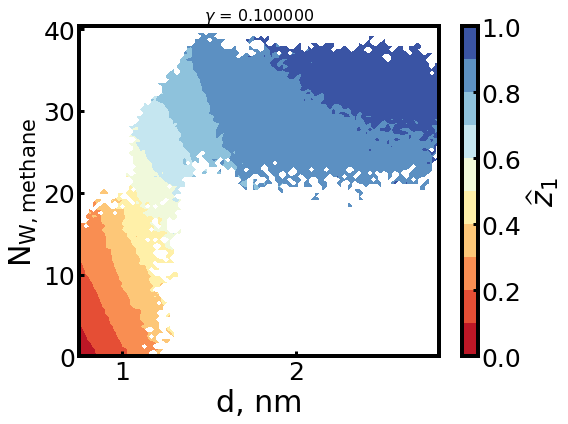

0.5918367348775512 tensor(34.9267, dtype=torch.float64, grad_fn=<MaxBackward1>)


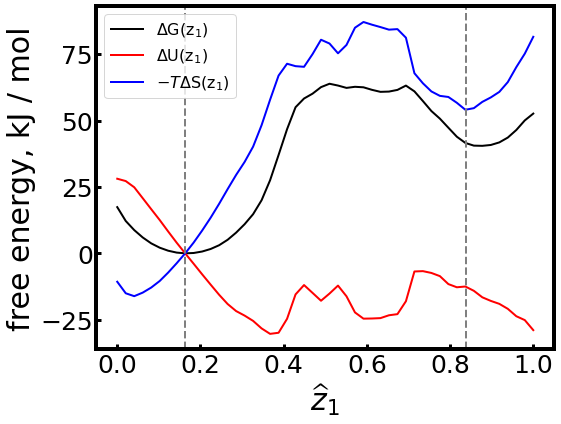

In [15]:
import matplotlib
from matplotlib import colors as c
nreps = 1
seed = 0
lr = 0.0001000
z1_bar_list = []
z_list = []
z1_thermo_list = []
z1_filtered_thermo_list = []
traj_labels_list = []
for nn in [64]:
    for lag in [1]:
        for beta in [1e-1]:
            for gamma in [1e-1]:
                for bandwidth in ["1e-1"]:
                    print(nn, beta, gamma, lag, bandwidth)
                    path = '../analysis/sparse/delta_variational/'


                    try:
                        prefix='../analysis/sparse/delta_variational/' + bandwidth + '/neurons/' + str(nn) + '/Unweighted_d=1_t=' + str(lag) + '_b=%.9f_gamma=%.9f_learn=%.6f' % (beta, gamma, lr)
                        #print(prefix)
                        repeat = str(seed)
                        IB = reconstruct_SPIB(beta, gamma, bandwidth, nn, lag, RC_dim = 1, pseduo_dim = 10, output_dim = 10, data_shape = (6,),
                        encoder_type = 'Nonlinear', seed = seed, path = path)
                        data_torch = torch.Tensor(data)
                        data_torch.requires_grad = True
                        outputs, z_sample, z_mean, z_logvar = IB.forward(data_torch)

                        tensor_weights = torch.Tensor(big_weights)
                        aux_loss, G11, U11, S11 = constraints.delta_variational(data_torch, 
                                                                                     z_mean, Ut, 
                                                                                     bins = 50, bandwidth = 1.0, 
                                                                                     output_thermo = output_thermo,
                                                                                     b = b, weights = tensor_weights)
                        z = z_mean.detach().numpy()

                        #print('loading labels...')
                        dummy = []
                        for i in range(nreps):
                            dummy.append(np.load(prefix + "_traj" + str(i) + "_labels" + repeat + ".npy"))
                        traj_labels = np.concatenate(dummy, axis = 0)

                        labels=traj_labels
                         # clean labeled trajectory by removing any states that are not sampled
                        idx = np.argwhere(np.all(traj_labels == 0, axis=0))
                        labels = np.delete(traj_labels, idx, axis=1)
                        dtrajs = labels.argmax(1)
                        nstates = len(np.unique(dtrajs))
                        print(nstates)
                        #if len(np.unique(dtrajs)) <= 2:
                        #    break
                        hist=plt.hist2d(x,y,bins=100)


                        state_num=labels.shape[1]
                        state_labels=np.arange(state_num)

                        hist_state=np.zeros([state_num]+list(hist[0].shape))

                        for i in range(state_num):
                            hist_state[i]=plt.hist2d(x,y,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

                        label_map50=np.argmax(hist_state,axis=0).astype(float)
                        label_map50[hist[0]==0]=np.nan
                        plt.close()
                        fig, ax = plt.subplots()

                        fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
                        tickz = np.arange(0,len(state_labels))

                        cMap = c.ListedColormap(plt.cm.tab20.colors[0:nstates])
                        im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
                        cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

                        # plot labels of occupied states
                        dummy = labels.sum(0)
                        xloc = -0.75
                        #for n, i in enumerate(dummy):
                        #    if i != 0:
                        #        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
                        #        xloc += 0.2

                        plt.xlabel(r"z, nm")
                        plt.ylabel(r"N$_{\mathrm{W, methane}}$")
                        plt.tight_layout()
                        plt.savefig(prefix + '_metastable_decomposition.pdf', dpi = 300)
                        plt.show()
                        plt.close()

                        z_1D_hat = (z_mean[:,0] - z_mean[:,0].min()) / (z_mean[:,0].max() - z_mean[:,0].min())


                        hist=np.histogram2d(x,y,bins=100)
                        hist_RC=np.histogram2d(x,y,bins=[hist[1],hist[2]], weights = z_1D_hat.detach().numpy())

                        fig, ax = plt.subplots()

                        RC=np.divide(hist_RC[0],hist[0])

                        im=ax.contourf(RC.T, extent=[hist_RC[1][0],hist_RC[1][-1],hist_RC[2][0],hist_RC[2][-1]],levels=10,
                                            cmap='RdYlBu')
                        cb1 = fig.colorbar(im,ax=ax)
                        cb1.set_label(r'$\widehat{z}_1$')

                        plt.xlabel(r"d, nm")
                        plt.ylabel(r"N$_{\mathrm{W, methane}}$")
                        plt.title(r'$\gamma$ = %f' % (gamma), fontsize = 16)
                        plt.tight_layout()
                        plt.savefig(prefix + '_RC_projection1.pdf', dpi = 300)
                        plt.show()
                        plt.close()

                        zbins = np.linspace(z_1D_hat.detach().numpy().min() - 1e-9, z_1D_hat.detach().numpy().max() + 1e-9, len(U11))
                        print(zbins[S11.argmax()], S11.max())
                        plt.plot(zbins, G11.detach().numpy() / b, lw = 2, c = 'k', label = r'$\Delta$G(z$_1$)')
                        plt.plot(zbins, U11.detach().numpy() / b, lw = 2, c = 'r', label = r'$\Delta$U(z$_1$)')
                        plt.plot(zbins, S11.detach().numpy() / b, lw = 2, c = 'b', label = r'$-T\Delta$S(z$_1$)')
                        plt.axvline(z_1D_hat.detach().numpy().min() + 0.5 * z_1D_hat.detach().numpy().std(), lw =2, c = 'grey', ls = '--')
                        plt.axvline(z_1D_hat.detach().numpy().max() - 0.5 * z_1D_hat.detach().numpy().std(), lw =2, c = 'grey', ls = '--')  
                        plt.legend()
                        plt.xlabel(r'$\widehat{z}_1$')
                        plt.ylabel('free energy, kJ / mol')
                        #plt.ylim((-50, 50))
                        plt.tight_layout()
                        #plt.savefig('figures/dSz_point_free_energy_profile_gamma_' + str(gamma) + '.pdf', dpi = 300)
                        plt.show()
                        plt.close()


                        # select endpoints plus a buffer of one standard deviation
                        z_min = z[:,0].min()
                        z_std = z[:,0].std()
                        z_max = z[:,0].max()


                        bins = 50
                        zbins = torch.linspace(z_min - 1e-9, z_max + 1e-9, bins)[:, None]
                        path = ~((zbins >= float(z_min + 0.5 * z_std)) ^ (zbins <= float(z_max - 0.5 * z_std)))
                        path = torch.ravel(path)
                        z1_bar_list.append(np.nanmax(S11[path].detach().numpy()) / b)
                        
                        thermo1_gamma_filtered = np.column_stack([G11[path].detach().numpy(), U11[path].detach().numpy(), S11[path].detach().numpy()]) / b
                        z1_filtered_thermo_list.append(thermo1_gamma_filtered)


                        bins = 50
                        zbins = torch.linspace(z_min - 1e-9, z_max + 1e-9, bins)[:, None]
                        path = ~((zbins >= float(z_min + 0.5 * z_std)) ^ (zbins <= float(z_max - 0.5 * z_std)))
                        path = torch.ravel(path)
                        
                        z1_thermo_list.append(np.column_stack([G11.detach().numpy(), U11.detach().numpy(), S11.detach().numpy()]) / b)
                        z_list.append(z)
                        
                    except FileNotFoundError:
                        pass
                    
z1_thermo = np.array(z1_thermo_list)

z1_filtered_thermo = np.array(z1_filtered_thermo_list, dtype = 'object')

zs = np.array(z_list)

2
88
(88,)


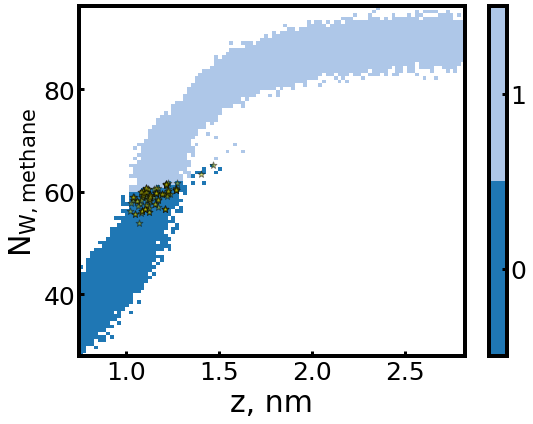

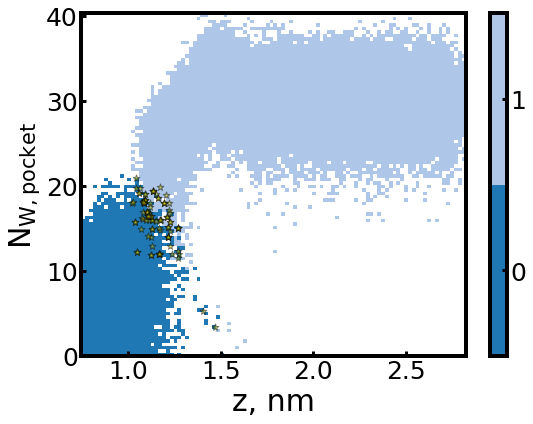

In [16]:
# get frames at the transition state

idx = np.argwhere(np.all(traj_labels == 0, axis=0))
labels = np.delete(traj_labels, idx, axis=1)
dtrajs = labels.argmax(1)
nstates = len(np.unique(dtrajs))
print(nstates)

k_list = []
for k, label in enumerate(dtrajs[:-1]):
    if (label == 0) and (dtrajs[k + 1] == 1): k_list.append(k)
print(len(k_list))
frames = np.array(k_list)
print(frames.shape)

frames19 = frames


random_frames19 = np.random.choice(frames19, size = 100)

np.savetxt('./random_frames19.txt', random_frames19, fmt = '%d')

hist=plt.hist2d(x,Nwm,bins=100)


state_num=labels.shape[1]
state_labels=np.arange(state_num)

hist_state=np.zeros([state_num]+list(hist[0].shape))

for i in range(state_num):
    hist_state[i]=plt.hist2d(x,Nwm,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

label_map50=np.argmax(hist_state,axis=0).astype(float)
label_map50[hist[0]==0]=np.nan
plt.close()
fig, ax = plt.subplots()

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
tickz = np.arange(0,len(state_labels))

cMap = c.ListedColormap(plt.cm.tab20.colors[0:nstates])
im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

prefix = 'z_buckyball'
# plot labels of occupied states
dummy = labels.sum(0)
xloc = -0.75
#for n, i in enumerate(dummy):
#    if i != 0:
#        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
#        xloc += 0.2
plt.scatter(x[random_frames19], Nwm[random_frames19], c = 'y', marker = '*', s = 50, zorder = 10, alpha = 0.5, edgecolor = 'k')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, methane}}$")
plt.tight_layout()
plt.savefig(prefix + 'z_Nwm_metastable_decomposition.pdf', dpi = 300)
plt.show()
plt.close()


hist=plt.hist2d(x,Nwp,bins=100)


state_num=labels.shape[1]
state_labels=np.arange(state_num)

hist_state=np.zeros([state_num]+list(hist[0].shape))

for i in range(state_num):
    hist_state[i]=plt.hist2d(x,Nwp,bins=[hist[1],hist[2]],weights=labels[:,i])[0]

label_map50=np.argmax(hist_state,axis=0).astype(float)
label_map50[hist[0]==0]=np.nan
plt.close()
fig, ax = plt.subplots()

fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: state_labels[x])
tickz = np.arange(0,len(state_labels))

cMap = c.ListedColormap(plt.cm.tab20.colors[0:nstates])
im=ax.pcolormesh(hist[1], hist[2], label_map50.T, cmap=cMap, vmin=-0.5, vmax=len(state_labels)-0.5)
cb1 = fig.colorbar(im,ax=ax,format=fmt, ticks=tickz)

# plot labels of occupied states
dummy = labels.sum(0)
xloc = -0.75
#for n, i in enumerate(dummy):
#    if i != 0:
#        ax.text(xloc,0,str(n),horizontalalignment='center',verticalalignment='center',fontsize=64)
#        xloc += 0.2
plt.scatter(x[random_frames19], y[random_frames19], c = 'y', marker = '*', s = 50, zorder = 10, alpha = 0.5, edgecolor = 'k')
plt.xlabel(r"z, nm")
plt.ylabel(r"N$_{\mathrm{W, pocket}}$")
plt.tight_layout()
plt.savefig(prefix + 'z_Nwp_metastable_decomposition.pdf', dpi = 300)
plt.show()
plt.close()

In [5]:
frames = np.loadtxt('./random_frames19.txt', dtype = int)

In [6]:
path = "../TERP/class_9/frame_"
result_list = []
nonzeros = []
lst = []
for frame in frames:
    try:
        print(frame)
        tmp = np.load(path + str(frame) + '/TERP_results_2/optimal_feature_weights.npy')
        #if tmp[3] != 0:
        result_list.append(tmp)
        lst.append(np.load(path + str(frame) + '/TERP_results_2/optimal_scores_unfaithfulness_interpretability.npy'))
        #else:
        #    pass
        nonzeros.append(np.nonzero(tmp))
    except FileNotFoundError:
        pass
score_array = np.array(lst)

63008
61092
92045
92660
49825
63014
48038
87563
49847
12678
49819
91979
8826
18002
87444
3118
31811
91981
9527
92145
11397
87444
49802
461
63004
3132
90543
3433
63001
8838
61092
60118
87434
92145
9524
67211
18002
87432
73698
91979
91979
87444
63014
87434
33198
92136
87444
18018
90543
18002
3132
87428
31811
87428
87432
87563
63014
49816
3138
48046
12668
37019
87428
63008
18039
48036
92648
87563
60118
87570
3125
63008
90546
18011
9527
87434
87432
18002
87428
92149
18021
467
92653
73698
63008
91139
49821
48075
63004
73688
43784
91979
73688
8823
92136
48075
92653
8823
31811
33198


In [7]:
labels = ['x', 'y', 'z', r'$\rho$', r'N$_{\mathrm{W, pocket}}$', r'N$_{\mathrm{W, buckyball}}$']

In [8]:
result_array = np.vstack([*result_list])

In [9]:
mean_result = abs(result_array).mean(0)
sem_result = 2 * abs(result_array).std(0) / np.sqrt(result_array.shape[0])

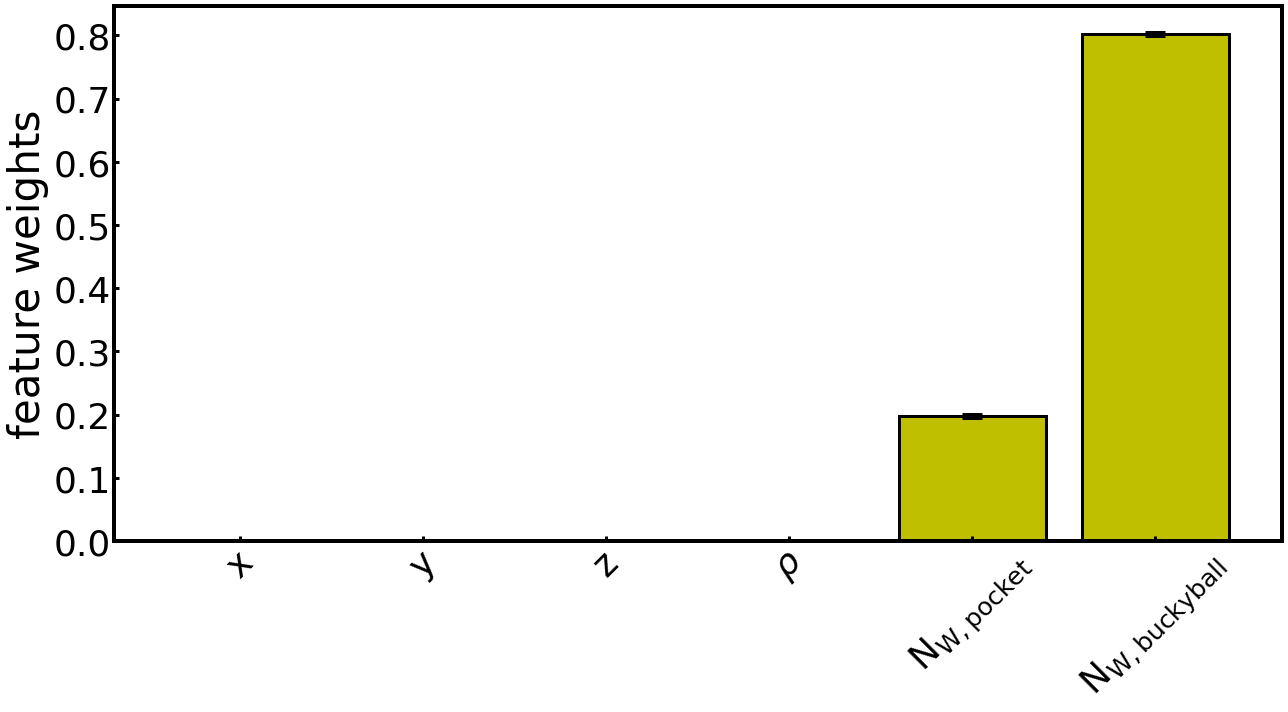

In [23]:
# transition between states 0 and 1
plt.figure(figsize = (18, 10))
plt.bar(np.arange(result_array.shape[1])[-2:], mean_result[-2:], yerr = sem_result[-2:], color = 'y',
       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
#plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
#                color = 'y')
#plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
#                color = 'y')
#plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
#plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
#            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = labels[-2:], rotation = 45, fontsize = 36)
plt.yticks(fontsize = 36)
plt.ylabel('feature weights', fontsize = 42)
#plt.yscale('log')
plt.tight_layout()
plt.savefig('TERP_features_coefficients_z_buckyball_revised.pdf', dpi = 300)
plt.show()
plt.close()

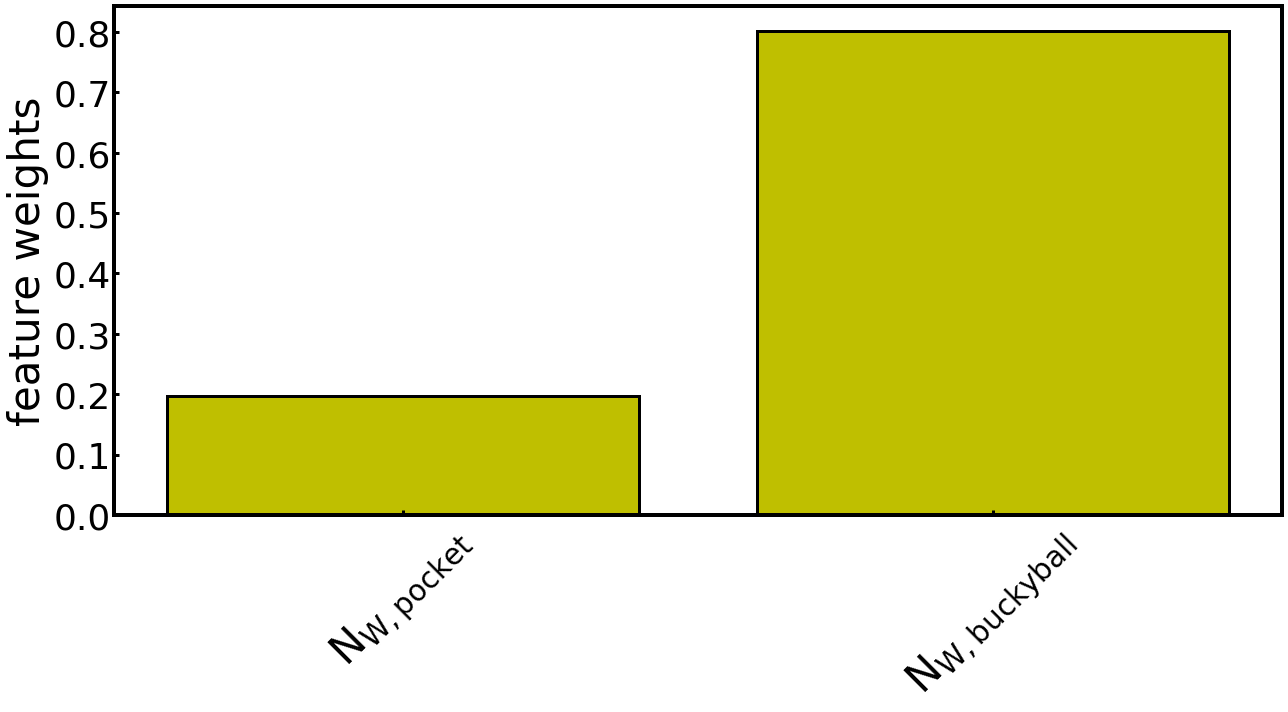

In [13]:
# transition between states 0 and 1
plt.figure(figsize = (18, 10))
#plt.bar(np.arange(result_array.shape[1])[-2:], mean_result[-2:], yerr = sem_result[-2:], color = 'y',
#       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
plt.bar(np.arange(result_array.shape[1])[-2:], mean_result[-2:], color = 'y', edgecolor = 'k', linewidth = 3)
#plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
#                color = 'y')
#plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
#                color = 'y')
#plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
#plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
#            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(mean_result.shape[0])[-2:], labels = labels[-2:], rotation = 45, fontsize = 42)
plt.yticks(fontsize = 36)
plt.ylabel('feature weights', fontsize = 42)
#plt.yscale('log')
plt.tight_layout()
plt.savefig('TERP_features_coefficients_z_buckyball_revised_truncated.pdf', dpi = 300)
plt.show()
plt.close()

In [24]:
grad_mean_list = []
grad_std_list = []
random_frames = frames
for i in range(data.shape[1]):
    dx = np.random.normal(scale = data.std(0)[i]) / 10
    #print(dx)
    perturbed_data = torch.Tensor(data)
    perturbed_data[:,i]  = perturbed_data[:,i] + dx
    z_perturbed, _ = IB.encode(perturbed_data)
    z_mean, _ = IB.encode(torch.Tensor(data))
    grad = (z_perturbed[random_frames,0] - z_mean[random_frames,0]) / dx
    
    grad_mean_list.append(torch.abs(grad).mean().detach().numpy())
    grad_std_list.append(2 * (torch.abs(grad).std().detach().numpy() / np.sqrt(100)))
    #print(grad.mean())
    #print(grad.std() / np.sqrt(10))

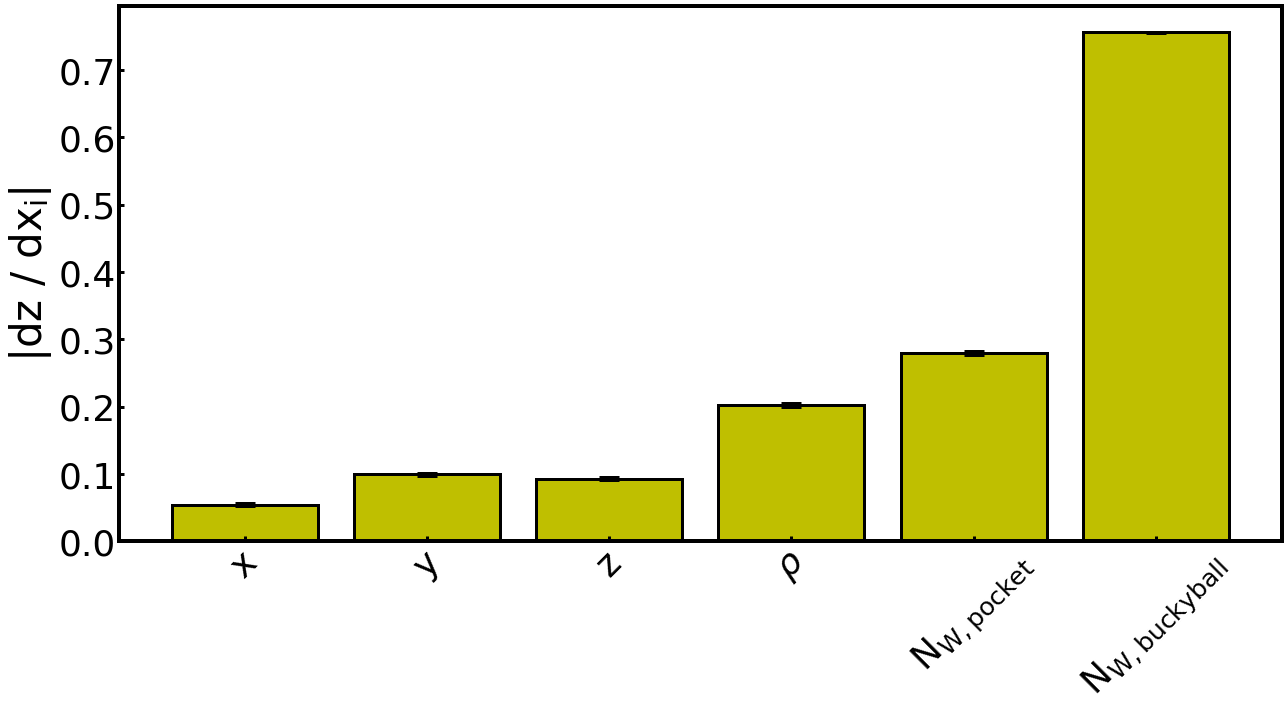

In [25]:
# transition between states 0 and 1
plt.figure(figsize = (18, 10))
plt.bar(np.arange(len(grad_mean_list)), grad_mean_list, yerr = grad_std_list, color = 'y',
       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
#plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
#                color = 'y')
#plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
#                color = 'y')
#plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
#plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
#            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(len(grad_mean_list)), labels = labels, rotation = 45, fontsize = 36)
plt.yticks(fontsize = 36)
plt.ylabel(r'|dz / dx$_{\mathrm{i}}$|', fontsize = 42)
plt.tight_layout()
#plt.savefig('gamma1e-1_TERP_features_coefficients_methane.pdf', dpi = 300)
plt.show()
plt.close()

In [26]:
mean_result = abs(score_array).mean(0)
sem_result = 2 * abs(score_array).std(0) / np.sqrt(score_array.shape[0])

In [27]:
labels = ['U', 'S']

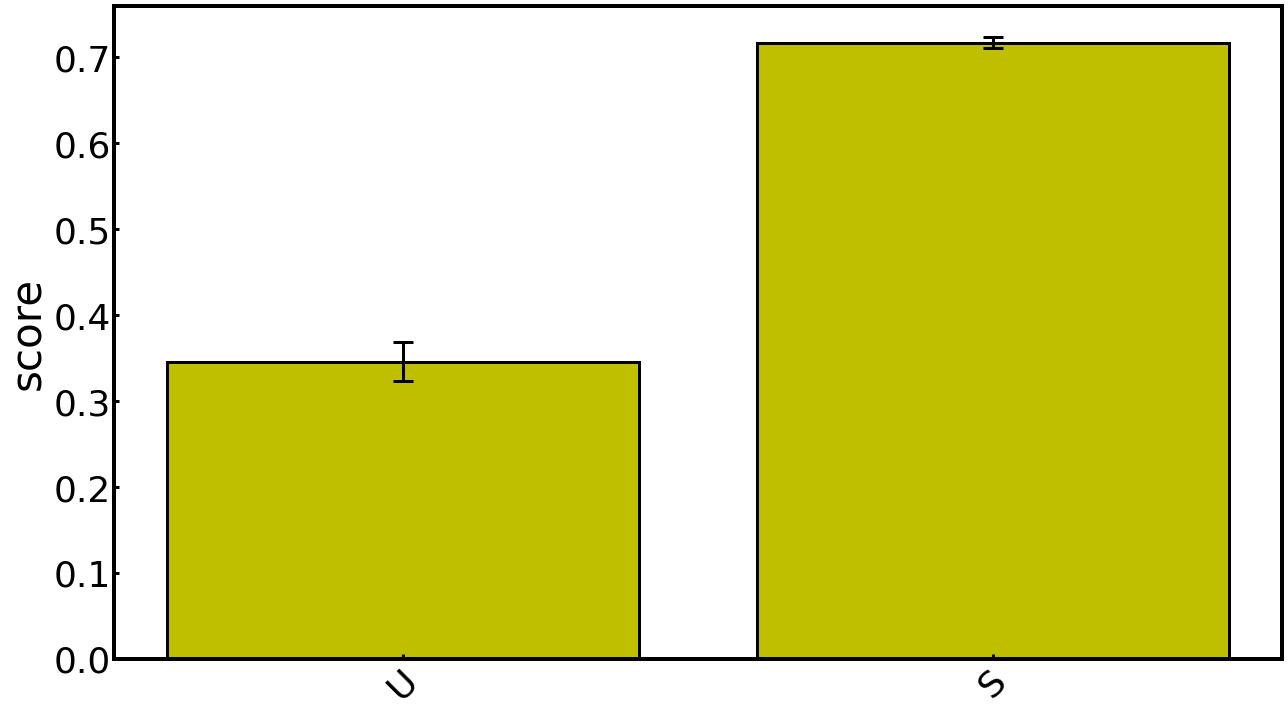

In [28]:
# transition between states 0 and 1
plt.figure(figsize = (18, 10))
plt.bar(np.arange(score_array.shape[1]), mean_result, yerr = sem_result, color = 'y',
       edgecolor = 'k', linewidth = 3, capsize = 10, error_kw = dict(lw = 3, capsize = 10, capthick = 3))
#plt.fill_between(np.arange(result_array.shape[1]), mean_result - sem_result, mean_result, alpha = 0.5,
#                color = 'y')
#plt.fill_between(np.arange(result_array.shape[1]), mean_result, sem_result + mean_result, alpha = 0.5,
#                color = 'y')
#plt.plot(np.arange(result_array.shape[1]), mean_result, lw = 3, color = 'y')
#plt.errorbar(np.arange(result_array.shape[1]), mean_result, yerr = sem_result, capsize = 8, elinewidth = 3,
#            ecolor = 'k', c = 'k', lw = 3)
plt.xticks(ticks = np.arange(mean_result.shape[0]), labels = labels, rotation = 45, fontsize = 36)
plt.yticks(fontsize = 36)
plt.ylabel('score', fontsize = 42)
plt.tight_layout()
#plt.savefig('gamma4e-3_TERP_features_coefficients_buckyball.pdf', dpi = 300)
plt.show()
plt.close()